# Trabajo Práctico 1
### Alumnos:
##### Patricio Avigliano,
##### Kevin Cajachuán,
##### Guillermo Condori,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('properati_data_final.csv', low_memory = False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457318 entries, 0 to 457317
Data columns (total 21 columns):
id                            182721 non-null object
created_on                    457318 non-null object
property_type                 457318 non-null object
place_with_parent_names       457318 non-null object
geonames_id                   366919 non-null float64
lat                           321223 non-null float64
lon                           321223 non-null float64
price                         457318 non-null float64
currency                      457318 non-null object
price_aprox_local_currency    457318 non-null float64
price_aprox_usd               457318 non-null float64
surface_in_m2                 167885 non-null float64
surface_total_in_m2           153274 non-null float64
surface_covered_in_m2         191528 non-null float64
price_usd_per_m2              292691 non-null float64
price_per_m2                  188233 non-null float64
floor                         

In [4]:
data.isnull().sum()

id                            274597
created_on                         0
property_type                      0
place_with_parent_names            0
geonames_id                    90399
lat                           136095
lon                           136095
price                              0
currency                           0
price_aprox_local_currency         0
price_aprox_usd                    0
surface_in_m2                 289433
surface_total_in_m2           304044
surface_covered_in_m2         265790
price_usd_per_m2              164627
price_per_m2                  269085
floor                         380046
rooms                         211938
expenses                      422965
description                    33113
actual                             0
dtype: int64

In [5]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_in_m2,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
count,3.669190e+05,321223.000000,321223.000000,4.573180e+05,4.573180e+05,4.573180e+05,167885.000000,153274.000000,191528.000000,2.926910e+05,1.882330e+05,77272.000000,245380.000000
mean,3.506732e+06,-34.562008,-58.572447,3.094105e+05,2.976493e+06,2.396340e+05,278.166370,242.079713,147.447355,1.810266e+03,4.033955e+03,14.388420,2.809748
std,4.756614e+05,0.723365,1.431624,8.763100e+05,4.794511e+06,3.541241e+05,1582.228635,1603.577710,3986.167372,3.592022e+03,2.352093e+04,110.524304,1.441364
min,3.427208e+06,-89.999744,-164.531250,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,6.073508e-02,0.000000,0.000000
25%,3.429617e+06,-34.634010,-58.573406,9.800000e+04,1.046364e+06,9.490000e+04,46.000000,49.000000,46.000000,9.375000e+02,1.500000e+03,2.000000,2.000000
50%,3.430787e+06,-34.596907,-58.479151,1.620000e+05,1.764450e+06,1.500000e+05,90.000000,90.000000,77.000000,1.615385e+03,2.039535e+03,3.000000,3.000000
75%,3.435719e+06,-34.546783,-58.419344,3.100000e+05,3.297629e+06,2.700000e+05,257.000000,228.000000,160.000000,2.250000e+03,2.809524e+03,6.000000,4.000000
max,6.693230e+06,-0.002038,-0.001717,2.161802e+08,8.212711e+08,5.000000e+07,192014.000000,200000.000000,987897.000000,1.271027e+06,4.000000e+06,8661.000000,39.000000


## ¿Cuántas propiedades hay de cada tipo?

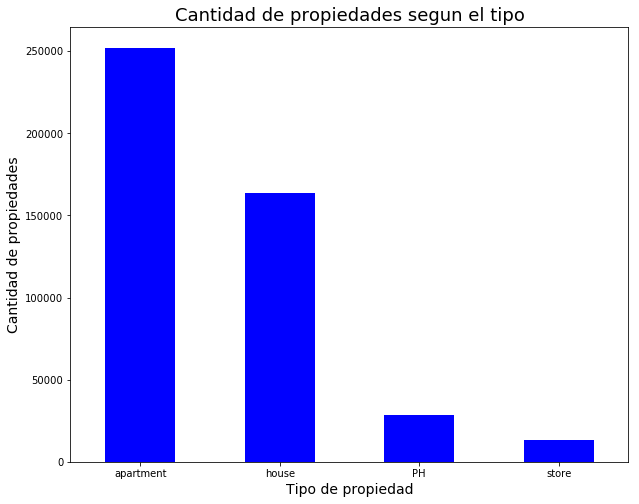

In [6]:
tipos = data['property_type'].value_counts()
tipos.plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de propiedades segun el tipo', fontsize = 18)
plt.xlabel('Tipo de propiedad', fontsize = 14)
plt.ylabel('Cantidad de propiedades', fontsize = 14)

## ¿Dónde se encuentran las 20 propiedades más caras?

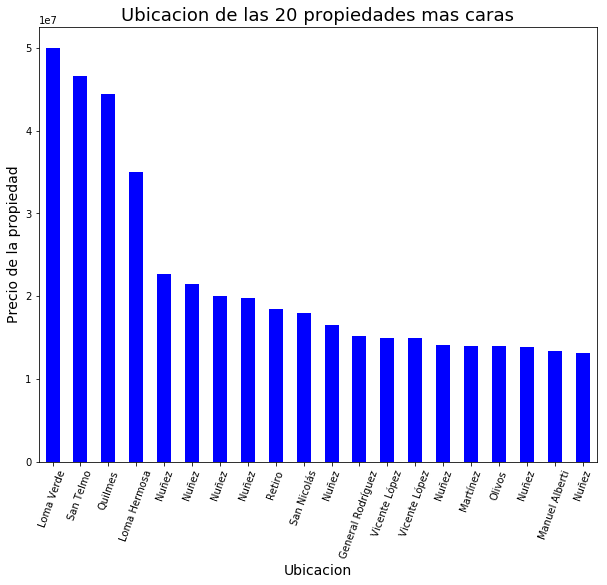

In [7]:
masCaros = data.sort_values('price_aprox_usd', ascending = False).head(20)
masCaros['place'] = masCaros['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
masCaros.plot(kind = 'bar', rot = 70, x = 'place', y = 'price_aprox_usd', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de las 20 propiedades mas caras', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Precio de la propiedad', fontsize = 14)

## ¿Dónde se encuentran las 10 casas más caras?

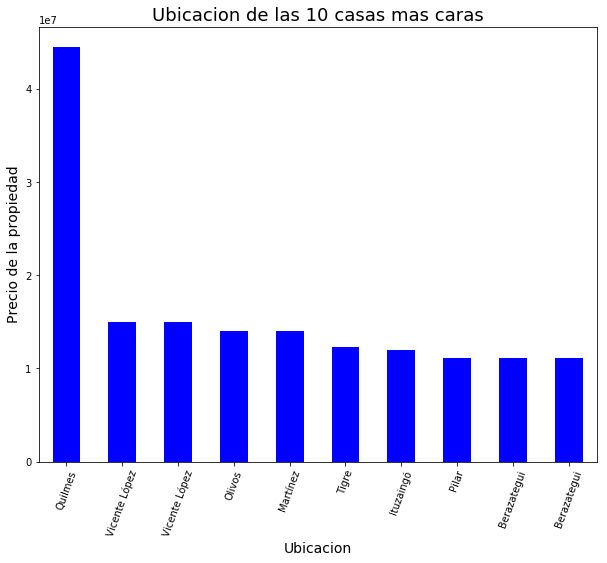

In [8]:
casasMasCaras = data[data.property_type == 'house'].sort_values('price_aprox_usd', ascending = False).head(10)
casasMasCaras['place'] = casasMasCaras['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
casasMasCaras.plot(kind = 'bar', rot = 70, x = 'place', y = 'price_aprox_usd', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de las 10 casas mas caras', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Precio de la propiedad', fontsize = 14)

## ¿Dónde se encuentran los 10 departamentos más caros?

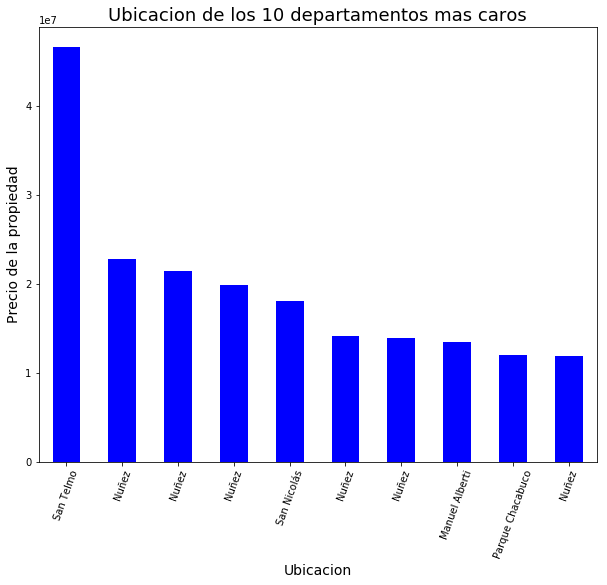

In [9]:
depaMasCaros = data[data.property_type == 'apartment'].sort_values('price_aprox_usd', ascending = False).head(10)
depaMasCaros['place'] = depaMasCaros['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
depaMasCaros.plot(kind = 'bar', rot = 70, x = 'place', y = 'price_aprox_usd', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de los 10 departamentos mas caros', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Precio de la propiedad', fontsize = 14)

## ¿Dónde se encuentran los 10 PH más caros?

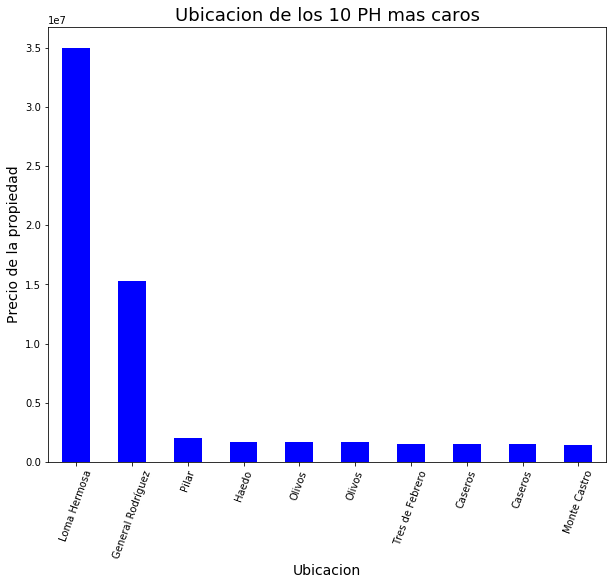

In [10]:
phMasCaros = data[data.property_type == 'PH'].sort_values('price_aprox_usd', ascending = False).head(10)
phMasCaros['place'] = phMasCaros['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
phMasCaros.plot(kind = 'bar', rot = 70, x = 'place', y = 'price_aprox_usd', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de los 10 PH mas caros', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Precio de la propiedad', fontsize = 14)

## ¿Dónde se encuentran las 10 tiendas más caras?

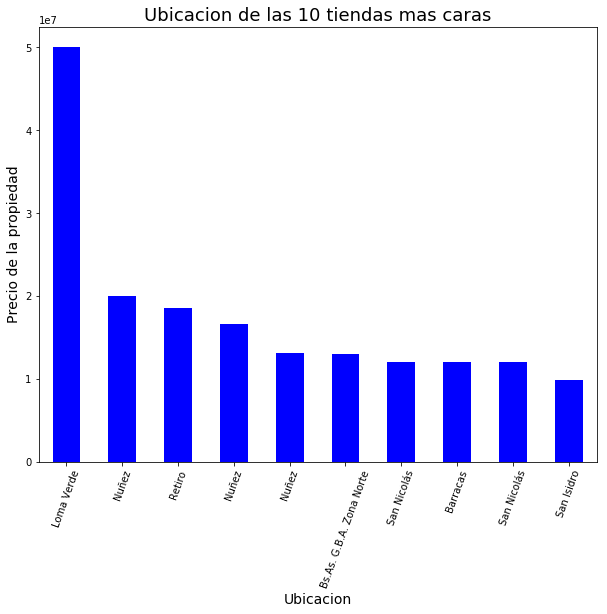

In [11]:
tiendasMasCaras = data[data.property_type == 'store'].sort_values('price_aprox_usd', ascending = False).head(10)
tiendasMasCaras['place'] = tiendasMasCaras['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
tiendasMasCaras.plot(kind = 'bar', rot = 70, x = 'place', y = 'price_aprox_usd', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de las 10 tiendas mas caras', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Precio de la propiedad', fontsize = 14)

## ¿Dónde se encuentran las 10 casas más grandes?

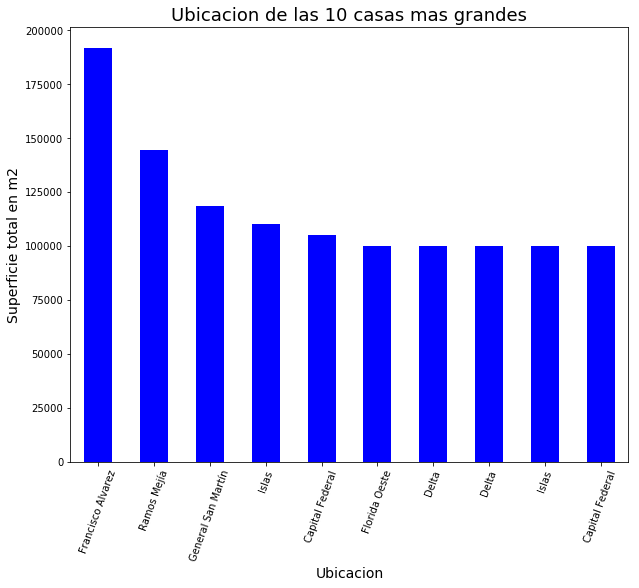

In [12]:
casasMasGrandes = data[data.property_type == 'house'].sort_values('surface_total_in_m2',ascending=False).head(10)
casasMasGrandes['place'] = casasMasGrandes['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
casasMasGrandes.plot(kind = 'bar', rot = 70, x = 'place', y = 'surface_total_in_m2', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de las 10 casas mas grandes', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Superficie total en m2', fontsize = 14)

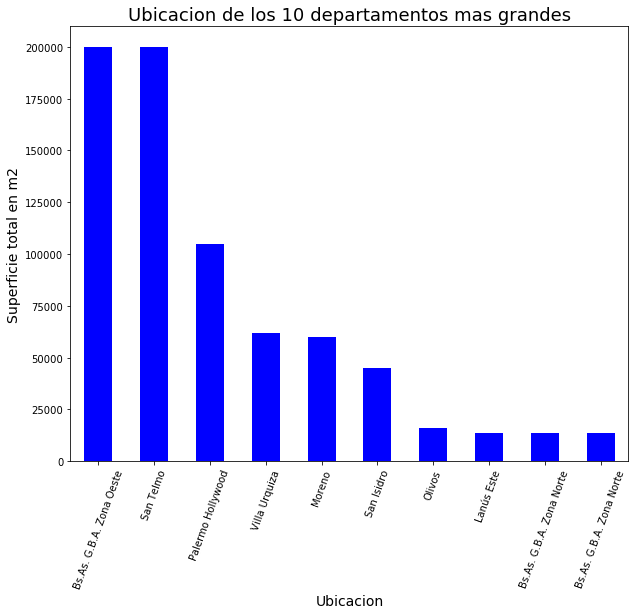

In [13]:
depaMasGrandes = data[data.property_type == 'apartment'].sort_values('surface_total_in_m2',ascending=False).head(10)
depaMasGrandes['place'] = depaMasGrandes['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
depaMasGrandes.plot(kind = 'bar', rot = 70, x = 'place', y = 'surface_total_in_m2', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de los 10 departamentos mas grandes', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Superficie total en m2', fontsize = 14)

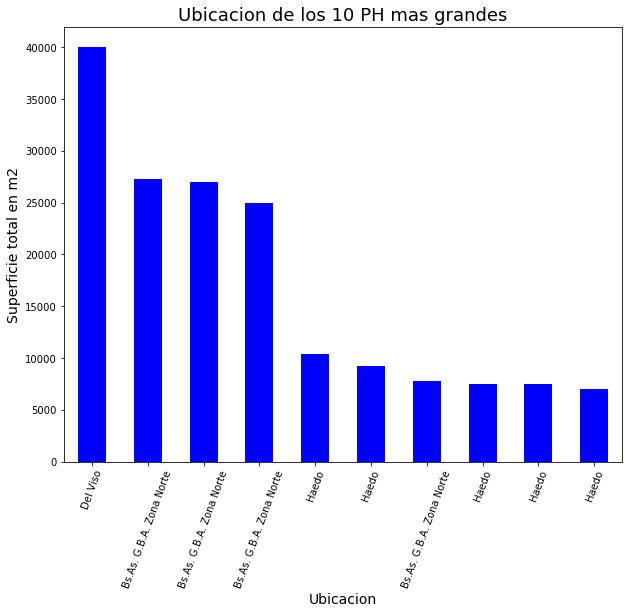

In [14]:
phMasGrandes = data[data.property_type == 'PH'].sort_values('surface_total_in_m2',ascending=False).head(10)
phMasGrandes['place'] = phMasGrandes['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
phMasGrandes.plot(kind = 'bar', rot = 70, x = 'place', y = 'surface_total_in_m2', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de los 10 PH mas grandes', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Superficie total en m2', fontsize = 14)

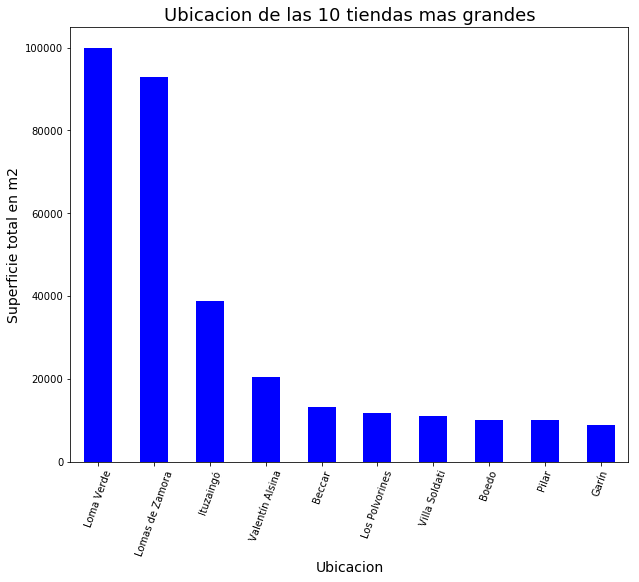

In [15]:
tiendasMasGrandes = data[data.property_type == 'store'].sort_values('surface_total_in_m2',ascending=False).head(10)
tiendasMasGrandes['place'] = tiendasMasGrandes['place_with_parent_names'].apply(lambda x: x.split('|')[-2])
tiendasMasGrandes.plot(kind = 'bar', rot = 70, x = 'place', y = 'surface_total_in_m2', \
              figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de las 10 tiendas mas grandes', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Superficie total en m2', fontsize = 14)

## Cantidad de propiedades por zona

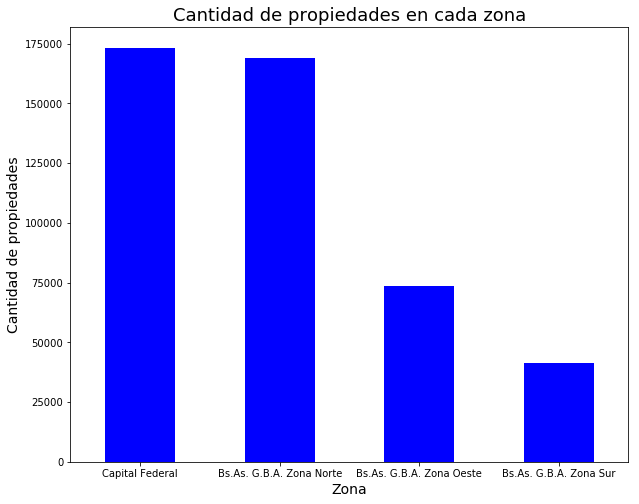

In [42]:
def devolver_zona(x):
    if x.find('Capital Federal') != -1:
        return 'Capital Federal'
    elif x.find('Bs.As. G.B.A. Zona Norte') != -1:
        return 'Bs.As. G.B.A. Zona Norte'
    elif x.find('Bs.As. G.B.A. Zona Sur') != -1:
        return 'Bs.As. G.B.A. Zona Sur'
    else:
        return 'Bs.As. G.B.A. Zona Oeste'


zonas = data
zonas['state'] = zonas['place_with_parent_names'].apply(devolver_zona)
cantZonas = zonas['state'].value_counts()
cantZonas.plot(kind = 'bar', rot = 0, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de propiedades en cada zona', fontsize = 18)
plt.xlabel('Zona', fontsize = 14)
plt.ylabel('Cantidad de propiedades', fontsize = 14)

## ¿Qué zona es más cara?

In [57]:
zonas[['price_aprox_usd', 'state']].groupby('state').agg(np.mean).sort_values('price_aprox_usd', ascending = False)

,price_aprox_usd
state,
Bs.As. G.B.A. Zona Norte,301988.716838
Capital Federal,229365.047960
Bs.As. G.B.A. Zona Sur,188525.743720
Bs.As. G.B.A. Zona Oeste,149336.889329


## Propiedades publicadas en cada año

In [82]:
data['created_on'] = pd.to_datetime(data['created_on'])

In [94]:
cantPubli = data[['created_on']]
cantPubli.loc[:,'cantidad_publicaciones'] = 1

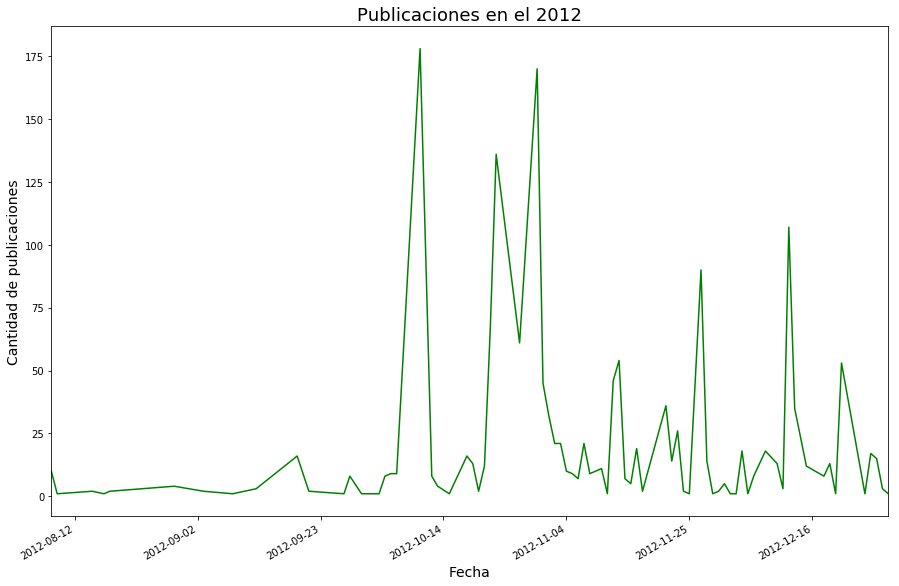

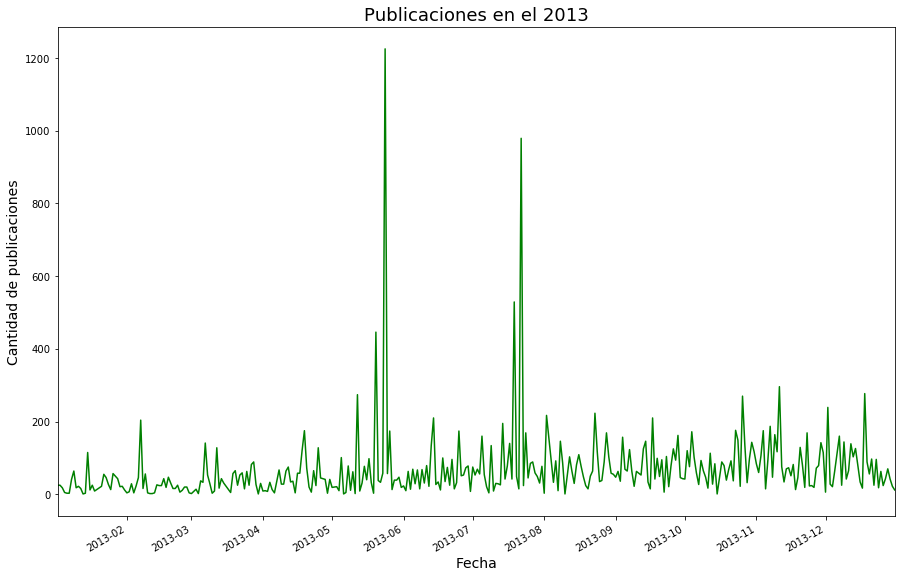

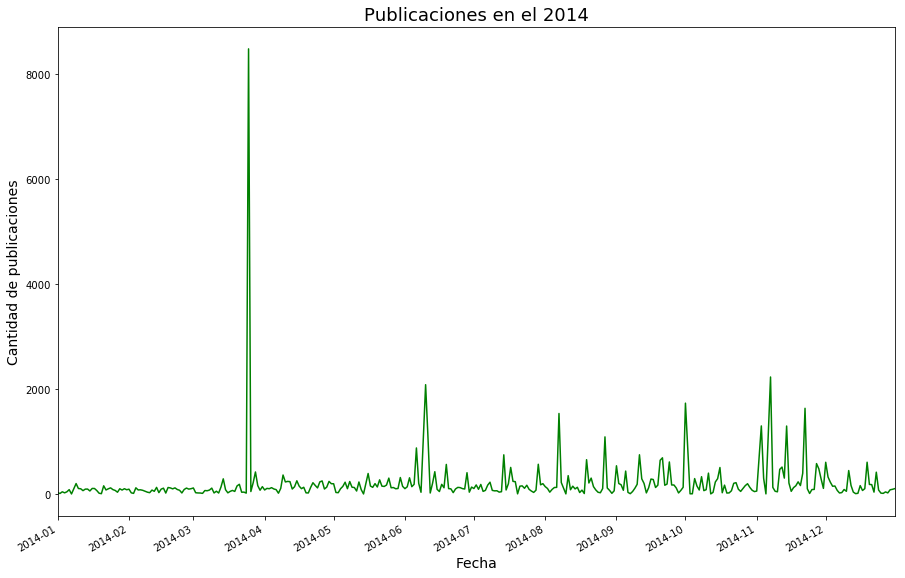

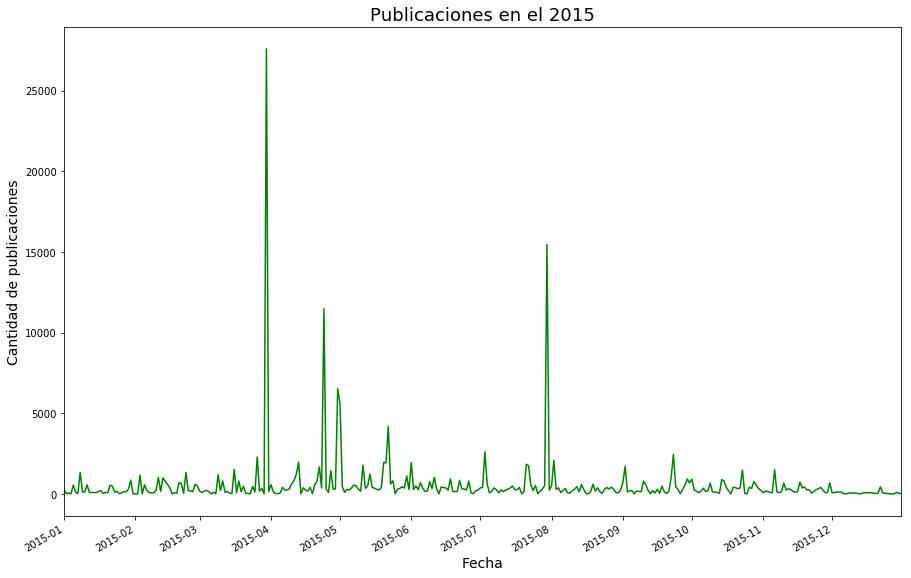

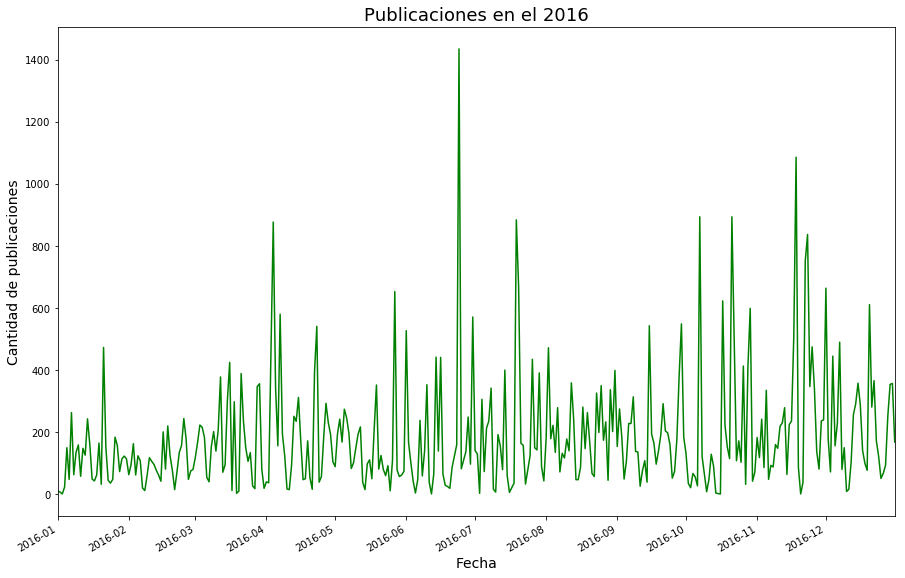

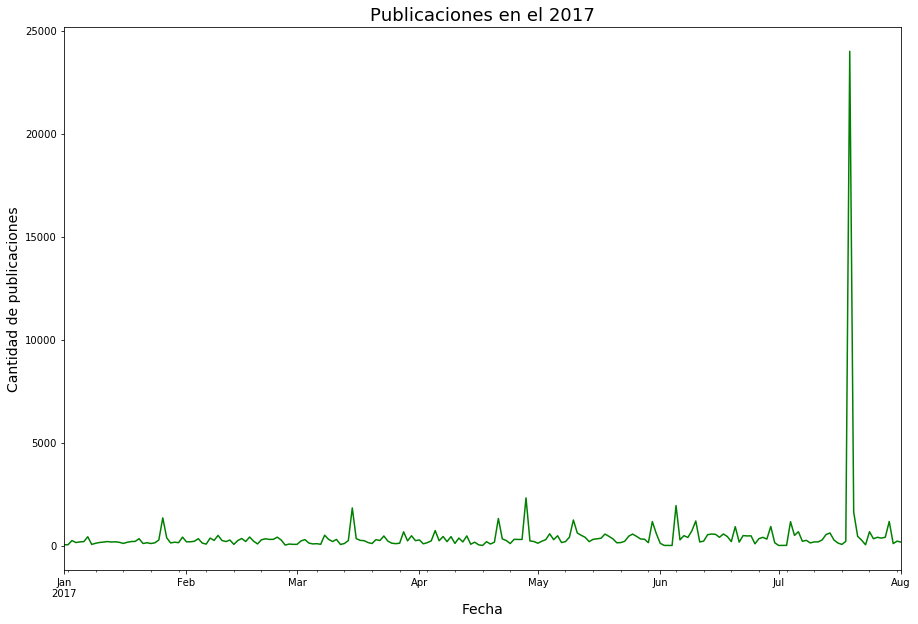

In [109]:
for i in range(2012, 2018):
    cantPubli.loc[cantPubli.created_on.dt.year == i]\
    .groupby('created_on').agg(sum).plot.line(figsize=(15,10), color='green', legend = None)
    plt.title('Publicaciones en el ' + str(i), fontsize = 18)
    plt.xlabel('Fecha', fontsize = 14)
    plt.ylabel('Cantidad de publicaciones', fontsize = 14)

## Cantidad de propiedades por zona

In [ ]:
location = data['place_with_parent_names'].value_counts()
tagsCount={}
for key in location.keys():
    aux=key.split('|')
    aux=aux[1:-1]
    for tag in aux:
        tagsCount[tag]=tagsCount.get(tag,0)+location[key]
tagsCount.pop('')
tagsCount.pop('Argentina')
tagsCount['Country Maschwitz Club']=tagsCount.pop(' Country Maschwitz Club')
tagsCount['los alamos']=tagsCount.pop(' los alamos')

In [ ]:
capitalYGB

In [ ]:
capitalYGB={}
capitalYGB['Capital Federal']=tagsCount.pop('Capital Federal')
capitalYGB['Bs.As. G.B.A. Zona Norte']=tagsCount.pop('Bs.As. G.B.A. Zona Norte')
capitalYGB['Bs.As. G.B.A. Zona Sur']=tagsCount.pop('Bs.As. G.B.A. Zona Sur')
capitalYGB['Bs.As. G.B.A. Zona Oeste']=tagsCount.pop('Bs.As. G.B.A. Zona Oeste')
capitalYGB = pd.DataFrame.from_items(capitalYGB.items(), orient='index', columns = ['cantidad'])
capitalYGB.plot(kind = 'bar', rot = 70, figsize = (10, 8), color = 'blue', legend = None)
plt.title('Ubicacion de las 10 casas mas grandes', fontsize = 18)
plt.xlabel('Ubicacion', fontsize = 14)
plt.ylabel('Superficie total en m2', fontsize = 14)

In [ ]:
tagsRelevantes={}
for key in tagsCount:
    if tagsCount[key]>15500:
        tagsRelevantes[key]=tagsCount[key]
tagsRelevantes

In [ ]:
dataPorLocation = {}
housePorLocation = {}
storePorLocation = {}
phPorLocation = {}
apartmentPorLocation = {}
for location in tagsRelevantes:
    dataPorLocation[location] = data[data.place_with_parent_names.str.contains(location)]
    housePorLocation[location] = dataPorLocation[location][dataPorLocation[location].property_type=='house']
    storePorLocation[location] = dataPorLocation[location][dataPorLocation[location].property_type=='store']
    apartmentPorLocation[location] = dataPorLocation[location][dataPorLocation[location].property_type=='apartment']
    phPorLocation[location] = dataPorLocation[location][dataPorLocation[location].property_type=='PH']

In [ ]:
meanPriceUsdPorLocation={}
for location in dataPorLocation:
    meanPriceUsdPorLocation[location]=dataPorLocation[location]['price_aprox_usd'].mean()
meanPriceUsdPorLocation

In [ ]:
meanHousePriceUsdPorLocation={}
for location in housePorLocation:
    meanHousePriceUsdPorLocation[location]=housePorLocation[location]['price_aprox_usd'].mean()
meanHousePriceUsdPorLocation

In [ ]:
meanStorePriceUsdPorLocation={}
for location in storePorLocation:
    meanStorePriceUsdPorLocation[location]=storePorLocation[location]['price_aprox_usd'].mean()
meanStorePriceUsdPorLocation

In [ ]:
meanPhPriceUsdPorLocation={}
for location in phPorLocation:
    meanPhPriceUsdPorLocation[location]=phPorLocation[location]['price_aprox_usd'].mean()
meanPhPriceUsdPorLocation

In [ ]:
meanApartmentPriceUsdPorLocation={}
for location in apartmentPorLocation:
    meanApartmentPriceUsdPorLocation[location]=apartmentPorLocation[location]['price_aprox_usd'].mean()
meanApartmentPriceUsdPorLocation